In [82]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import PPO, A2C, SAC
import gym_unbalanced_disk

#env = gym.make('unbalanced-disk-v0', dt=0.025, umax=3.) 
env = gym_unbalanced_disk.UnbalancedDisk(dt=0.025, umax=3.) #alternative


#model = SAC('MlpPolicy', env, verbose=1)
model = PPO('MlpPolicy', env, verbose=1) #b)
model.learn(total_timesteps=100000)


import time
env = gym_unbalanced_disk.UnbalancedDisk(dt=0.025, umax=3.)
obs, info = env.reset()
try:
    for _ in range(1000):
        action, _states = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        env.render()
        # time.sleep(1/50)
        if terminated or truncated:
            env.reset()
finally:
    env.close()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 714  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 567           |
|    iterations           | 2             |
|    time_elapsed         | 7             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00065786706 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -30.8         |
|    learning_rate        | 0.0003        |
|    loss                 | -0.00698      |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00066

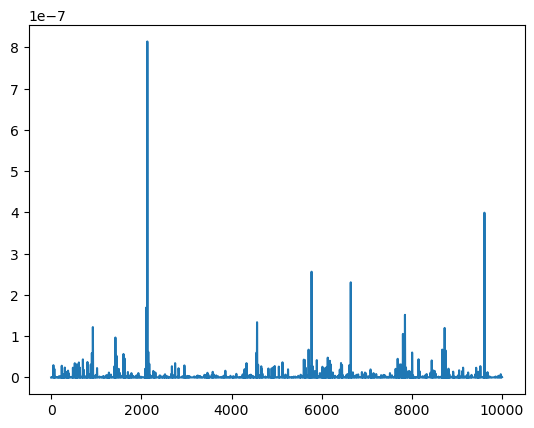

In [83]:
import time
import matplotlib.pyplot as plt
env = gym_unbalanced_disk.UnbalancedDisk(dt=0.025, umax=3.)
obs, info = env.reset()
rewards = []
try:
    for _ in range(10000):
        action, _states = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        rewards.append(reward)
        env.render()
        # time.sleep(1/50)
        if terminated or truncated:
            env.reset()
finally:
    env.close()
plt.plot(rewards)

In [68]:
(2.99*np.pi+np.pi)%(2*np.pi) - np.pi

3.1101767270538954

In [59]:
reward

0.14216632265035675